<a href="https://colab.research.google.com/github/tansexe/Longevity-Trends-Japan/blob/main/Japan%20Life%20Expectancy%20Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Japan Life Expectancy Analysis
This project explores the relationship between life expectancy and various health and demographic factors in Japan. We use correlation analysis and visualizations to uncover key insights that can support healthcare and economic decision-making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

In [3]:
# Load the dataset
df = pd.read_csv('Japan_life_expectancy.csv')

## Initial Data Exploration

In [4]:
# Display basic info and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Prefecture         47 non-null     object 
 1   Life_expectancy    47 non-null     float64
 2   Physician          47 non-null     float64
 3   Junior_col         47 non-null     float64
 4   University         47 non-null     float64
 5   Public_Hosp        47 non-null     float64
 6   Pshic_hosp         47 non-null     float64
 7   Beds_psic          47 non-null     float64
 8   Nurses             47 non-null     float64
 9   Avg_hours          47 non-null     float64
 10  Salary             47 non-null     float64
 11  Elementary_school  47 non-null     float64
 12  Sport_fac          47 non-null     float64
 13  Park               47 non-null     float64
 14  Forest             47 non-null     float64
 15  Income_per capita  47 non-null     float64
 16  Density_pop        47 non-nu

,0
Prefecture,0
Life_expectancy,0
Physician,0
Junior_col,0
University,0
Public_Hosp,0
Pshic_hosp,0
Beds_psic,0
Nurses,0
Avg_hours,0


In [5]:
# Summary statistics
df.describe()

,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,Salary,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,84.525745,261.438298,13.627660,18.621277,21.263830,1.114894,317.861702,1121.568085,173.914894,290.817021,...,17.070213,61.580851,3003.829787,1351.429787,6.874468,1130.825532,6.391489,3.359574,21.310426,15.968936
std,0.503133,40.948842,1.243191,4.459818,10.393548,0.557548,119.613115,244.333898,1.482943,24.657670,...,8.926412,14.966450,467.912446,1791.211704,2.783606,263.363158,1.874524,0.844970,2.923241,2.629713
min,82.800000,177.800000,11.300000,11.800000,7.400000,0.300000,147.700000,704.000000,171.000000,254.500000,...,4.500000,29.900000,2391.000000,230.200000,3.100000,676.900000,2.600000,2.060000,16.040000,10.310000
25%,84.240000,230.400000,12.850000,15.750000,14.650000,0.700000,224.050000,945.650000,173.000000,270.250000,...,10.950000,51.800000,2705.500000,601.750000,4.900000,949.100000,5.250000,2.780000,19.545000,14.150000
50%,84.540000,257.900000,13.500000,18.100000,19.200000,1.000000,299.000000,1096.100000,173.500000,291.500000,...,14.800000,66.300000,2945.000000,786.800000,5.900000,1112.800000,6.300000,3.210000,20.940000,15.600000
75%,84.885000,290.950000,14.350000,20.600000,25.300000,1.350000,367.150000,1278.200000,175.000000,303.575000,...,20.900000,73.650000,3175.000000,1260.250000,8.250000,1286.000000,7.400000,3.760000,23.525000,17.510000
max,85.500000,338.400000,16.900000,31.600000,49.100000,2.300000,594.900000,1640.700000,178.000000,378.150000,...,37.300000,83.300000,5415.000000,9873.300000,16.100000,2052.600000,11.600000,6.050000,27.530000,23.010000


## Data Sample

In [7]:
df.sample(10)

,Prefecture,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
22,Mie,84.64,231.6,12.2,18.0,25.9,0.7,260.3,948.6,176.0,...,36.1,64.2,3121.0,857.6,4.6,903.4,6.8,3.58,25.42,17.18
20,Kumamoto,85.07,297.0,12.8,16.3,18.2,2.2,502.7,1524.4,176.0,...,21.0,61.8,2667.0,632.8,9.8,1440.2,6.9,3.60,17.09,17.18
15,Iwate,83.85,207.3,12.7,12.7,42.9,1.2,339.6,1045.7,173.5,...,4.7,74.6,2841.0,322.7,6.4,1070.8,8.4,6.05,16.04,10.31
0,Aichi,84.65,224.4,13.6,23.7,13.7,0.5,164.3,845.4,171.5,...,17.2,42.1,3728.0,2517.7,3.8,758.7,3.7,2.06,21.41,16.53
34,Saitama,84.38,177.8,15.1,23.9,7.4,0.6,187.5,704.0,174.0,...,32.8,31.4,3047.0,2821.6,4.0,713.5,3.9,3.08,27.53,20.49
4,Ehime,84.24,276.7,14.2,18.0,17.4,1.0,329.7,1277.5,178.0,...,7.2,70.5,2658.0,801.2,9.1,1274.2,7.1,4.82,20.47,15.60
7,Fukushima,83.71,205.7,11.6,13.1,20.6,1.3,339.8,994.7,173.0,...,13.0,68.0,2943.0,433.3,5.6,1033.2,7.4,3.09,17.63,18.81
6,Fukuoka,84.54,309.9,14.2,20.4,8.9,1.2,407.0,1333.7,172.5,...,17.7,44.5,2885.0,1858.3,7.7,1328.3,3.8,2.54,18.82,21.51
13,Ibaraki,83.92,193.8,12.7,18.2,8.5,0.7,252.6,806.3,173.5,...,14.9,32.4,3327.0,737.2,5.3,917.2,6.0,3.06,26.37,17.50
46,Yamanashi,84.83,250.1,15.9,19.9,34.6,1.0,280.6,975.2,174.0,...,27.1,77.8,3160.0,849.8,6.4,1080.8,8.0,3.20,20.87,12.34


##Deducing Coefficients of Correlations:

In [10]:
from scipy.stats import pearsonr

In [11]:
x= df['Life_expectancy']
y = df['Physician']
pearson_corr, _ = pearsonr(x, y)
print(f"Pearson Correlation Coefficient: {pearson_corr:.2f}")

Pearson Correlation Coefficient: 0.32


In [12]:
from scipy.stats import spearmanr
spearman_corr, _ = spearmanr(x, y)
print(f"Spearman Correlation Coefficient: {spearman_corr:.2f}")

Spearman Correlation Coefficient: 0.30


In [13]:
from scipy.stats import kendalltau
kendall_corr, _ = kendalltau(x, y)
print(f"Kendall's Tau Correlation Coefficient: {kendall_corr:.2f}")

Kendall's Tau Correlation Coefficient: 0.21


##Coding the Correlation Matrix & Lower Triangular Heat Map:

In [14]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr(method='pearson')

correlation_matrix

,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,Salary,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
Life_expectancy,1.000000,0.321545,0.569207,0.560164,-0.091038,-0.240471,-0.263259,-0.054996,-0.111068,0.406123,...,0.333984,0.092351,0.187115,0.158864,-0.092374,-0.118355,-0.305427,-0.201134,0.146163,0.013767
Physician,0.321545,1.000000,-0.035781,0.085263,-0.222218,0.284066,0.412624,0.634156,0.087101,0.000284,...,-0.142976,0.266828,-0.064487,0.115146,0.583598,0.630412,0.093529,-0.118037,-0.324800,-0.097471
Junior_col,0.569207,-0.035781,1.000000,0.493770,-0.236237,-0.286641,-0.315751,-0.168570,-0.157295,0.346947,...,0.158243,-0.084737,0.111921,0.087792,-0.099235,-0.143010,-0.277607,-0.147398,0.406761,0.215782
University,0.560164,0.085263,0.493770,1.000000,-0.424736,-0.622081,-0.649952,-0.552220,-0.307384,0.917426,...,0.318036,-0.460691,0.628527,0.726845,-0.419245,-0.511784,-0.734139,-0.233743,0.212469,0.433148
Public_Hosp,-0.091038,-0.222218,-0.236237,-0.424736,1.000000,0.044287,-0.035775,-0.047848,-0.009090,-0.479907,...,-0.087362,0.437185,-0.273960,-0.415201,-0.241157,-0.070254,0.487300,0.404845,-0.286921,-0.639724
Pshic_hosp,-0.240471,0.284066,-0.286641,-0.622081,0.044287,1.000000,0.888039,0.793166,0.361776,-0.623879,...,-0.250108,0.316983,-0.375411,-0.461420,0.737030,0.695998,0.513682,0.130095,-0.294577,-0.324758
Beds_psic,-0.263259,0.412624,-0.315751,-0.649952,-0.035775,0.888039,1.000000,0.901373,0.415542,-0.691966,...,-0.313042,0.315056,-0.536076,-0.448442,0.828832,0.826189,0.478235,0.156640,-0.253113,-0.204522
Nurses,-0.054996,0.634156,-0.168570,-0.552220,-0.047848,0.793166,0.901373,1.000000,0.423440,-0.623615,...,-0.379048,0.447064,-0.524473,-0.439847,0.895933,0.927485,0.491548,0.036544,-0.260447,-0.242609
Avg_hours,-0.111068,0.087101,-0.157295,-0.307384,-0.009090,0.361776,0.415542,0.423440,1.000000,-0.366510,...,-0.080584,0.066040,-0.455959,-0.289924,0.348885,0.264759,0.218704,0.018794,0.051460,-0.011647
Salary,0.406123,0.000284,0.346947,0.917426,-0.479907,-0.623879,-0.691966,-0.623615,-0.366510,1.000000,...,0.375076,-0.531635,0.788920,0.799087,-0.477369,-0.558145,-0.722634,-0.350588,0.221217,0.455841


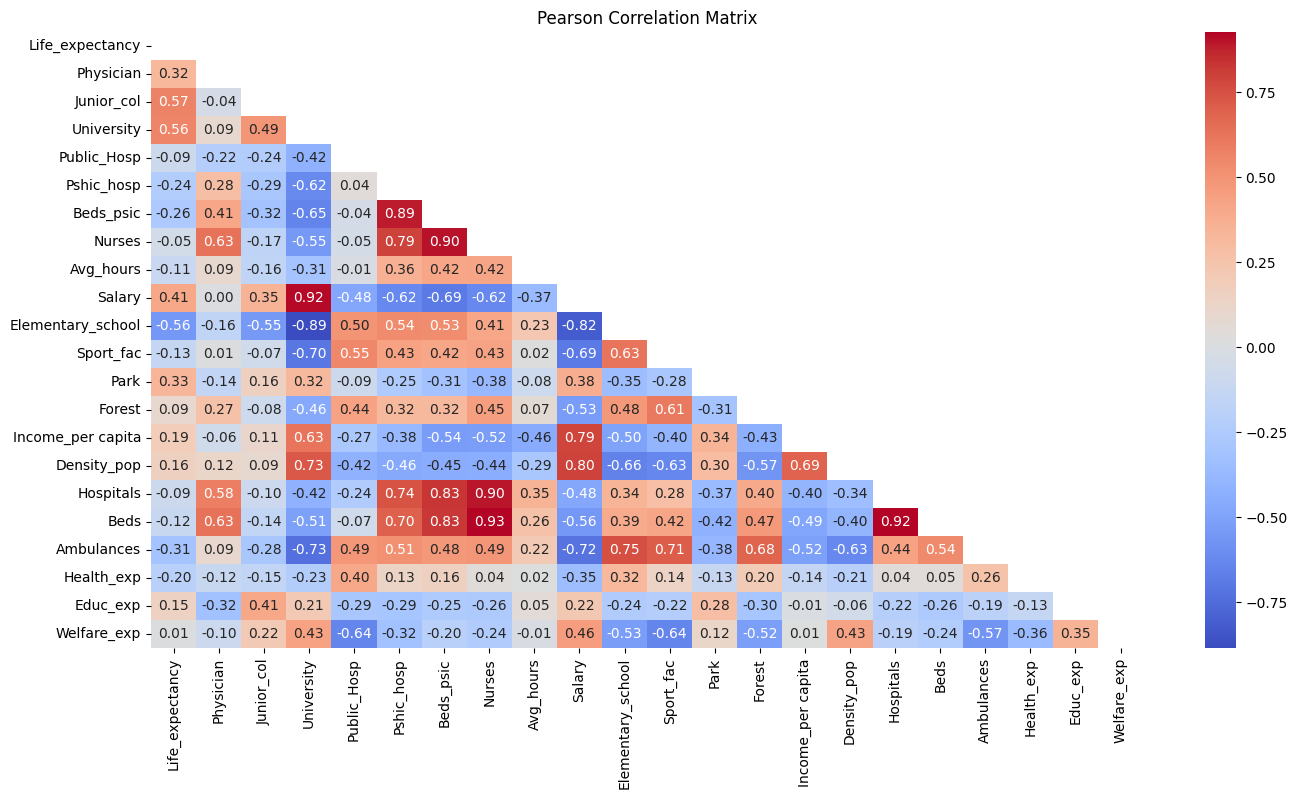

In [15]:
import seaborn as sns

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [16]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix_s = numeric_df.corr(method='spearman')

correlation_matrix_s

,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,Salary,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
Life_expectancy,1.000000,0.297635,0.453125,0.590758,0.078407,-0.286411,-0.330076,-0.097380,-0.083248,0.398196,...,0.364023,0.141387,0.176204,0.374834,-0.117227,-0.113861,-0.299384,-0.160030,0.076073,-0.037068
Physician,0.297635,1.000000,-0.010939,0.096105,-0.214331,0.233194,0.372803,0.644080,0.072596,-0.083141,...,-0.141317,0.270120,-0.299095,0.076665,0.627993,0.667900,0.053851,-0.107786,-0.287647,-0.144315
Junior_col,0.453125,-0.010939,1.000000,0.581418,-0.195224,-0.333421,-0.329793,-0.142729,-0.084727,0.434727,...,0.126389,-0.099320,0.258726,0.426509,-0.071621,-0.106728,-0.326491,-0.119826,0.403890,0.268913
University,0.590758,0.096105,0.581418,1.000000,-0.369697,-0.690116,-0.710845,-0.524648,-0.282708,0.889120,...,0.252371,-0.311678,0.601978,0.862116,-0.401215,-0.469251,-0.718327,-0.244636,0.246689,0.364714
Public_Hosp,0.078407,-0.214331,-0.195224,-0.369697,1.000000,0.151835,0.075357,0.019027,0.060309,-0.443583,...,-0.051505,0.430802,-0.225875,-0.447863,-0.104686,0.011682,0.486707,0.265899,-0.258437,-0.605795
Pshic_hosp,-0.286411,0.233194,-0.333421,-0.690116,0.151835,1.000000,0.887552,0.772463,0.351544,-0.711468,...,-0.286212,0.244442,-0.426134,-0.725615,0.720386,0.728340,0.589561,0.137519,-0.300256,-0.399694
Beds_psic,-0.330076,0.372803,-0.329793,-0.710845,0.075357,0.887552,1.000000,0.880782,0.374785,-0.776711,...,-0.342016,0.267461,-0.654852,-0.656105,0.803817,0.839616,0.532551,0.193021,-0.290191,-0.247463
Nurses,-0.097380,0.644080,-0.142729,-0.524648,0.019027,0.772463,0.880782,1.000000,0.394074,-0.651596,...,-0.398508,0.385870,-0.612992,-0.500347,0.927415,0.950162,0.473552,0.025154,-0.263132,-0.253592
Avg_hours,-0.083248,0.072596,-0.084727,-0.282708,0.060309,0.351544,0.374785,0.394074,1.000000,-0.305755,...,-0.074589,0.030687,-0.433219,-0.114505,0.382575,0.288278,0.226565,-0.032942,0.105711,0.028758
Salary,0.398196,-0.083141,0.434727,0.889120,-0.443583,-0.711468,-0.776711,-0.651596,-0.305755,1.000000,...,0.325826,-0.409574,0.765112,0.812211,-0.506883,-0.580134,-0.714579,-0.344638,0.357376,0.472319


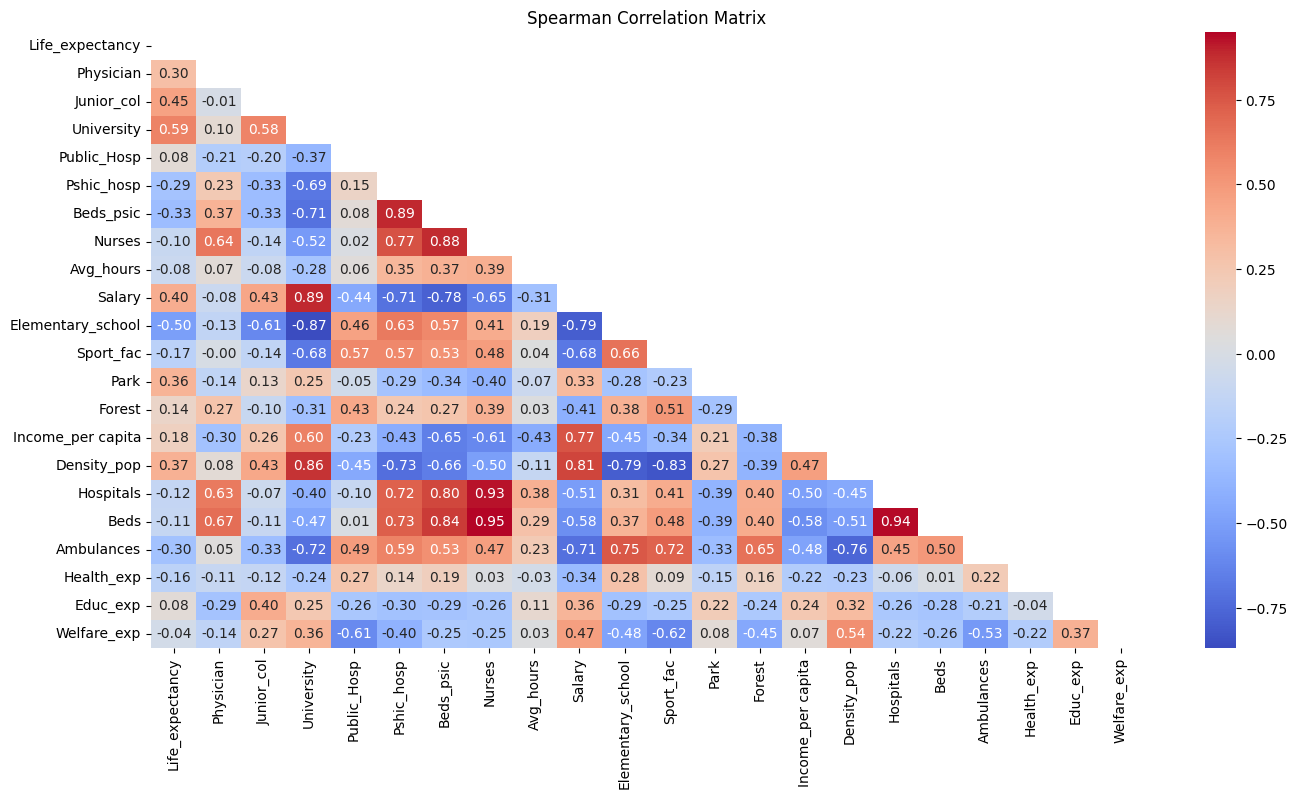

In [17]:
import seaborn as sns

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix_s, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix')
plt.show()

In [18]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix_k = numeric_df.corr(method='kendall')

correlation_matrix_k

,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,Salary,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
Life_expectancy,1.000000,0.208721,0.313778,0.416550,0.061481,-0.211489,-0.230984,-0.054731,-0.054169,0.275511,...,0.245239,0.095548,0.115082,0.251392,-0.093240,-0.078850,-0.207187,-0.118030,0.044548,-0.040835
Physician,0.208721,1.000000,-0.029979,0.057487,-0.169068,0.175751,0.269195,0.489362,0.055983,-0.069380,...,-0.088930,0.185939,-0.198056,0.037928,0.442591,0.487512,0.044673,-0.069509,-0.216566,-0.109209
Junior_col,0.313778,-0.029979,1.000000,0.427253,-0.131707,-0.217433,-0.237958,-0.099305,-0.058684,0.297916,...,0.089124,-0.088063,0.175271,0.294169,-0.055557,-0.076821,-0.215839,-0.073209,0.285869,0.194016
University,0.416550,0.057487,0.427253,1.000000,-0.256053,-0.504670,-0.509969,-0.376450,-0.194917,0.712102,...,0.173631,-0.216969,0.410947,0.693558,-0.292639,-0.346779,-0.534519,-0.170924,0.180891,0.234694
Public_Hosp,0.061481,-0.169068,-0.131707,-0.256053,1.000000,0.096352,0.059452,-0.007432,0.038464,-0.291689,...,-0.034419,0.304694,-0.160782,-0.336278,-0.103642,-0.016721,0.356075,0.174966,-0.175652,-0.448888
Pshic_hosp,-0.211489,0.175751,-0.217433,-0.504670,0.096352,1.000000,0.719153,0.582352,0.256190,-0.548152,...,-0.208340,0.179551,-0.326952,-0.527252,0.544278,0.544352,0.416715,0.096128,-0.207197,-0.285133
Beds_psic,-0.230984,0.269195,-0.237958,-0.509969,0.059452,0.719153,1.000000,0.713228,0.268127,-0.578168,...,-0.226031,0.165587,-0.479408,-0.481961,0.630413,0.648474,0.389025,0.136237,-0.218417,-0.166590
Nurses,-0.054731,0.489362,-0.099305,-0.376450,-0.007432,0.582352,0.713228,1.000000,0.287770,-0.472710,...,-0.287170,0.271045,-0.444239,-0.361702,0.768025,0.816836,0.340630,0.012048,-0.194354,-0.164739
Avg_hours,-0.054169,0.055983,-0.058684,-0.194917,0.038464,0.256190,0.268127,0.287770,1.000000,-0.224912,...,-0.059011,0.014732,-0.322294,-0.097233,0.297143,0.215091,0.163038,-0.031487,0.082539,-0.000983
Salary,0.275511,-0.069380,0.297916,0.712102,-0.291689,-0.548152,-0.578168,-0.472710,-0.224912,1.000000,...,0.235294,-0.283996,0.581212,0.666975,-0.379363,-0.407956,-0.539796,-0.232623,0.262841,0.344285


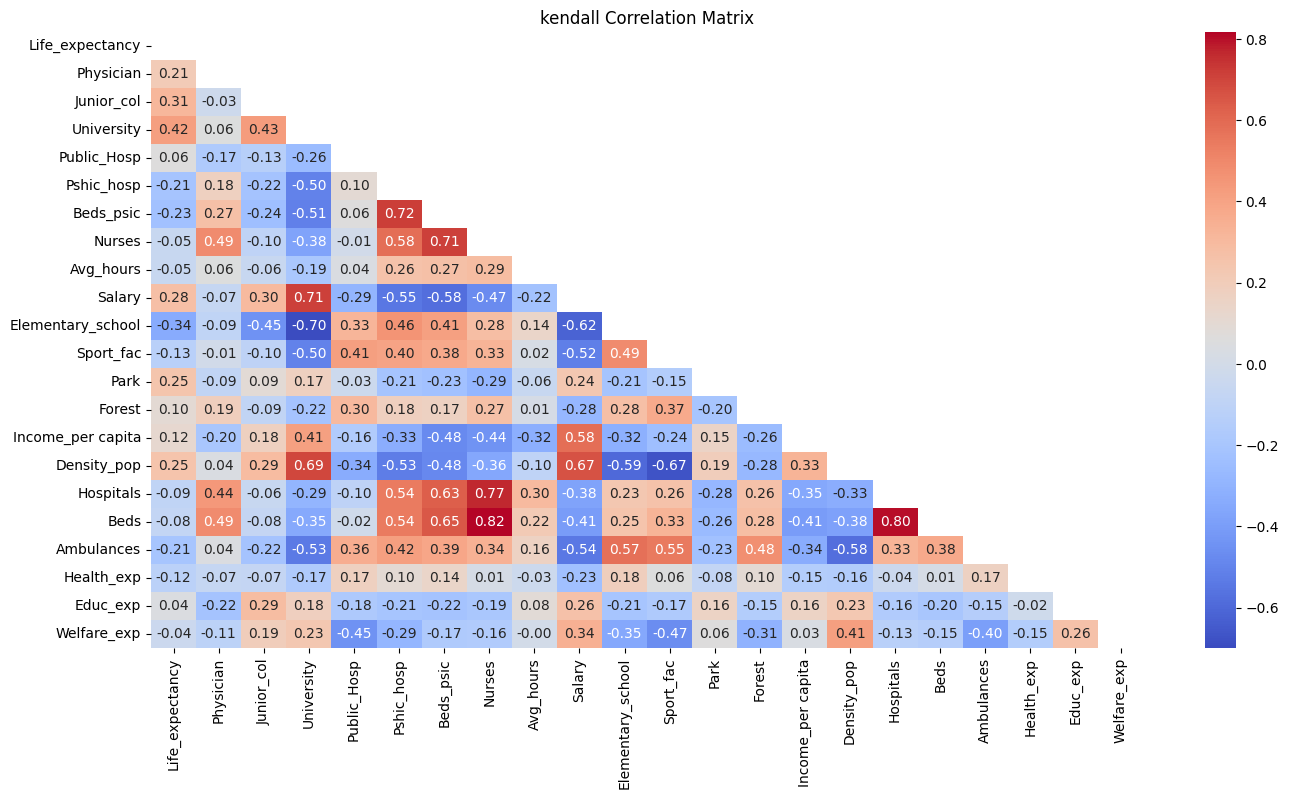

In [19]:
import seaborn as sns

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix_k, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('kendall Correlation Matrix')
plt.show()

##Ploting Heat Maps, with Strong correlation:

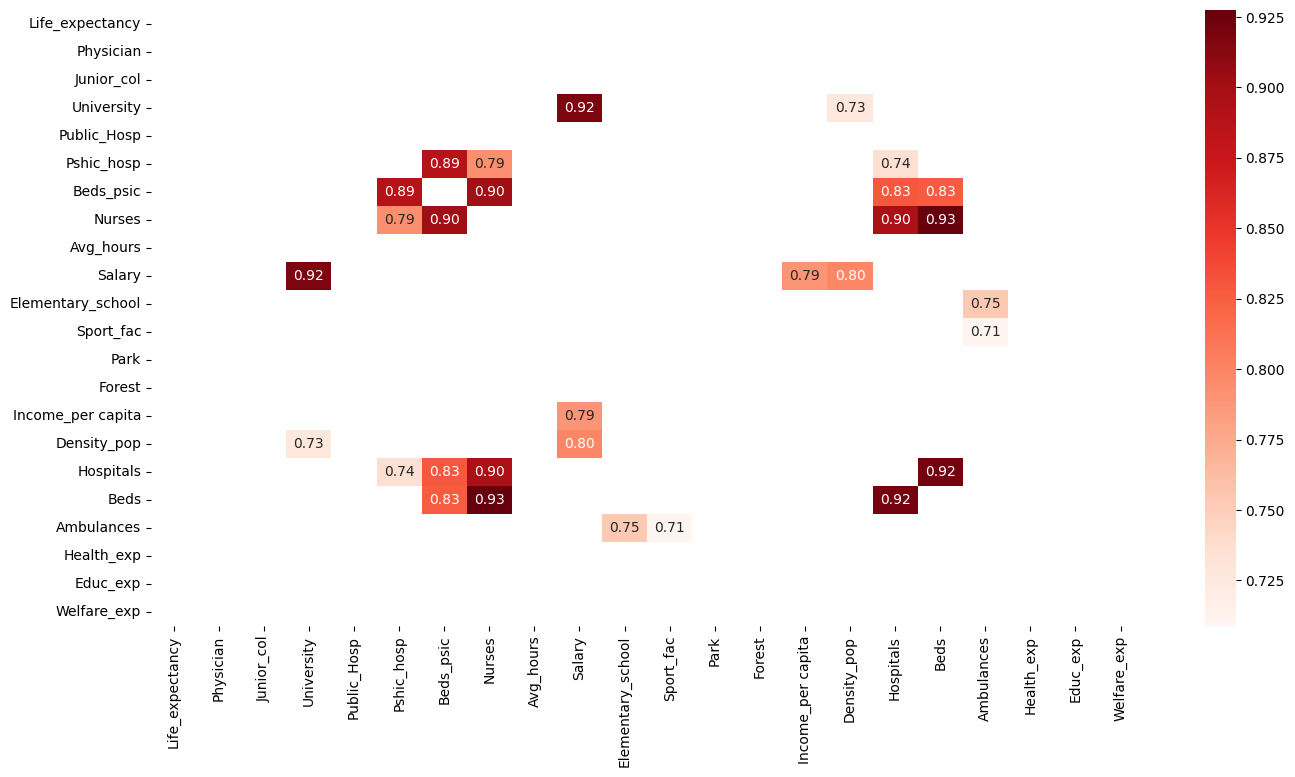

In [20]:
# For the first heatmap:
threshold = 0.7
mask = (correlation_matrix < threshold) | np.eye(correlation_matrix.shape[0], dtype=bool)
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Reds', fmt='.2f')
plt.show()

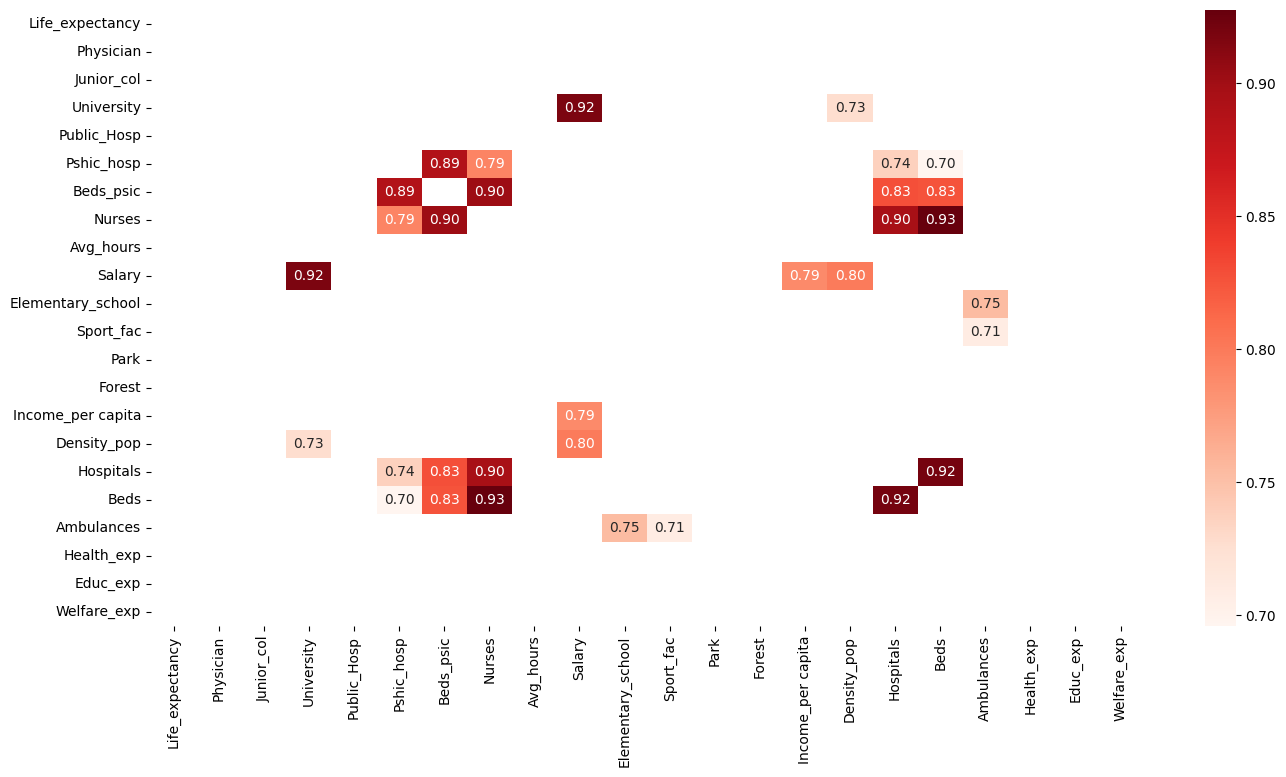

In [21]:
# For the second heatmap:
threshold = 0.7
mask = (correlation_matrix_s < threshold) | np.eye(correlation_matrix.shape[0], dtype=bool)
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Reds', fmt='.2f')
plt.show()

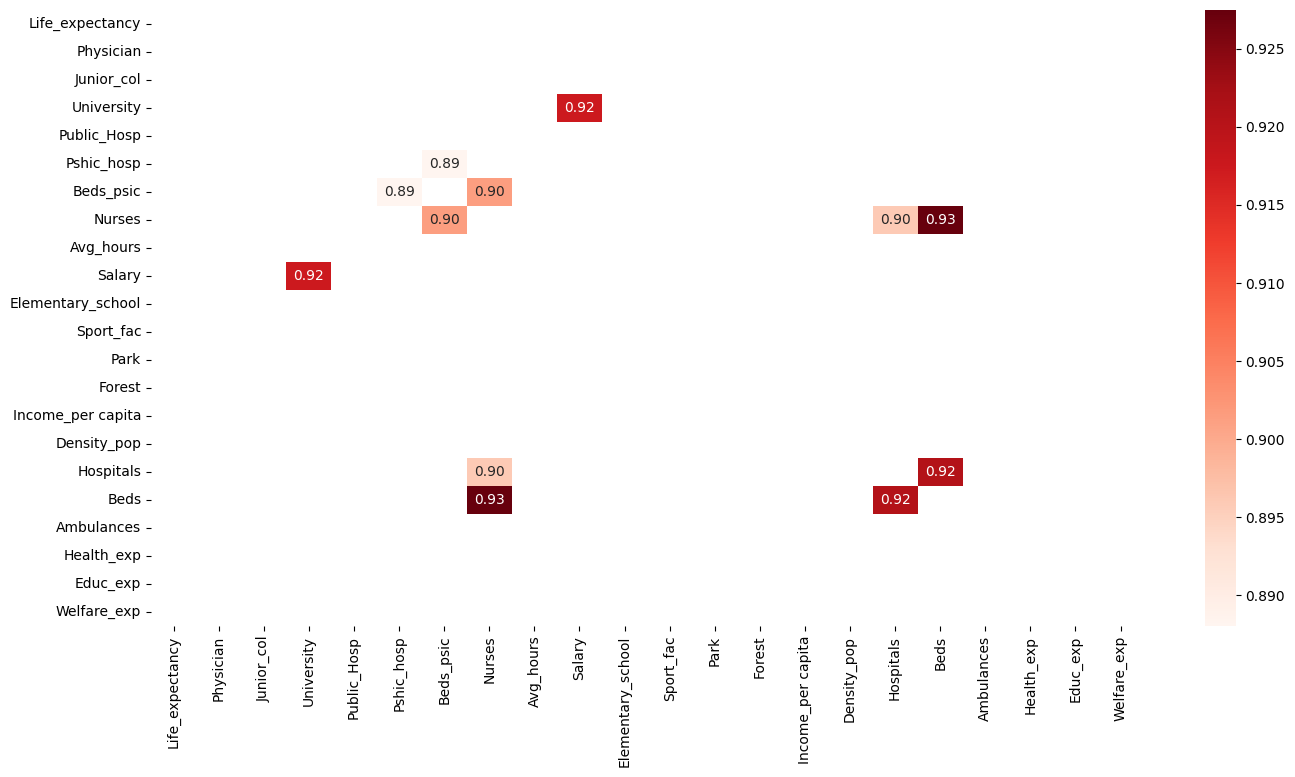

In [22]:
# For the third heatmap:
threshold = 0.7
mask = (correlation_matrix_k < threshold) | np.eye(correlation_matrix.shape[0], dtype=bool)
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Reds', fmt='.2f')
plt.show()

##Plotting Cluster Maps of Strong Correlations:

In [23]:
def filter_significant(corr_matrix, threshold=0.7):
    mask = (corr_matrix <= threshold) | np.eye(corr_matrix.shape[0], dtype=bool)
    filtered_matrix = corr_matrix.copy()
    filtered_matrix[mask] = 0
    filtered_matrix = filtered_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)
    return filtered_matrix

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


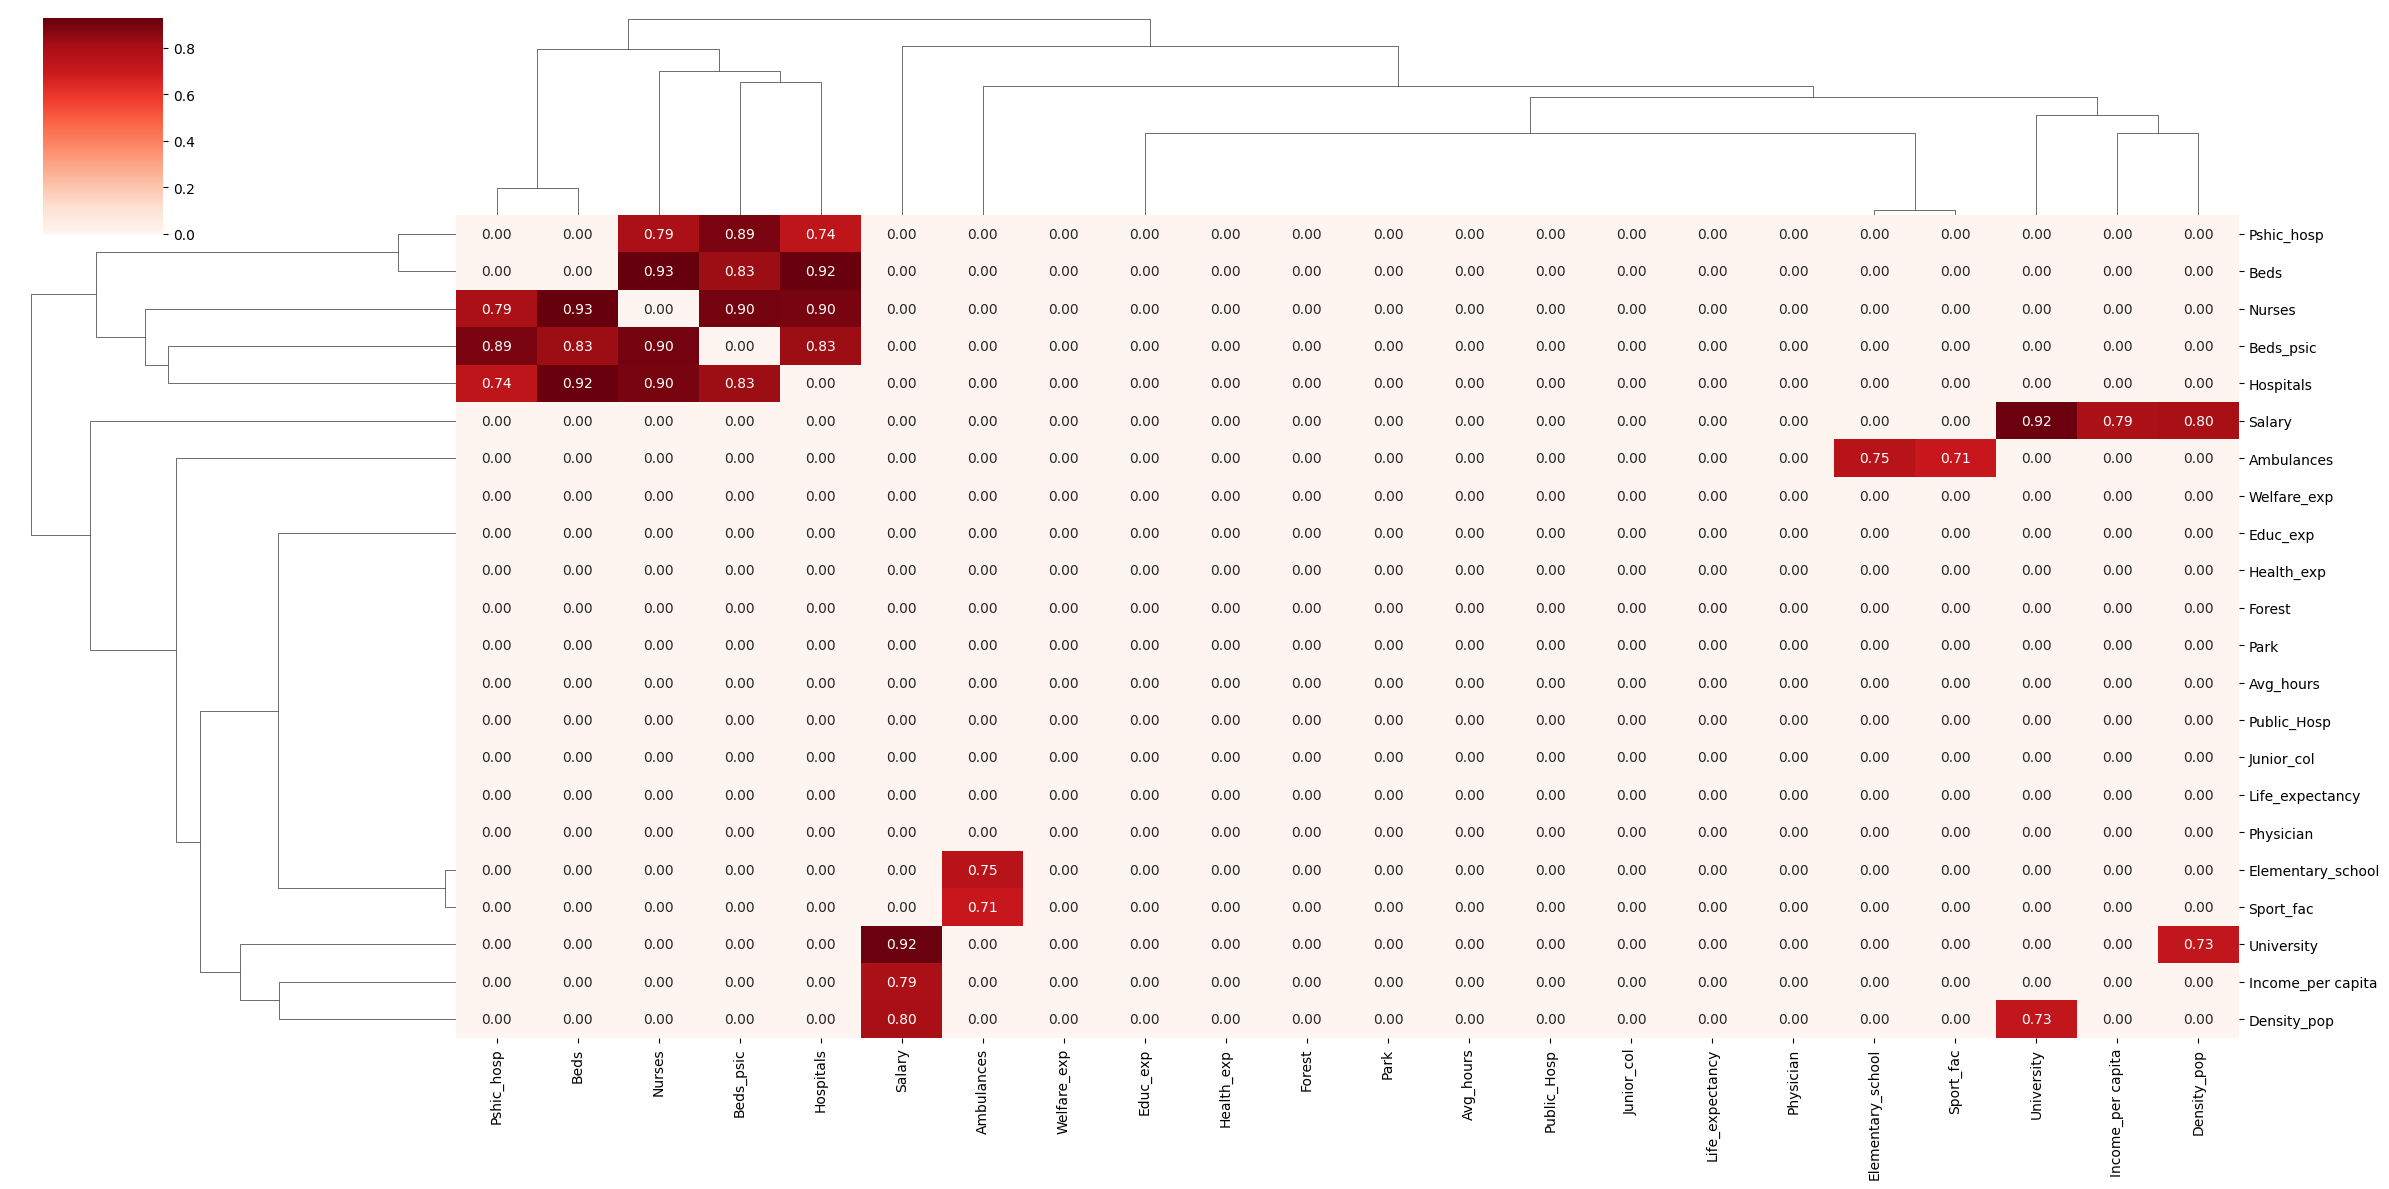

In [24]:
#Pearson
filtered_corr_matrix = filter_significant(correlation_matrix)
sns.clustermap(filtered_corr_matrix.fillna(0), annot=True, cmap='Reds', fmt='.2f', figsize=(24, 12))
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


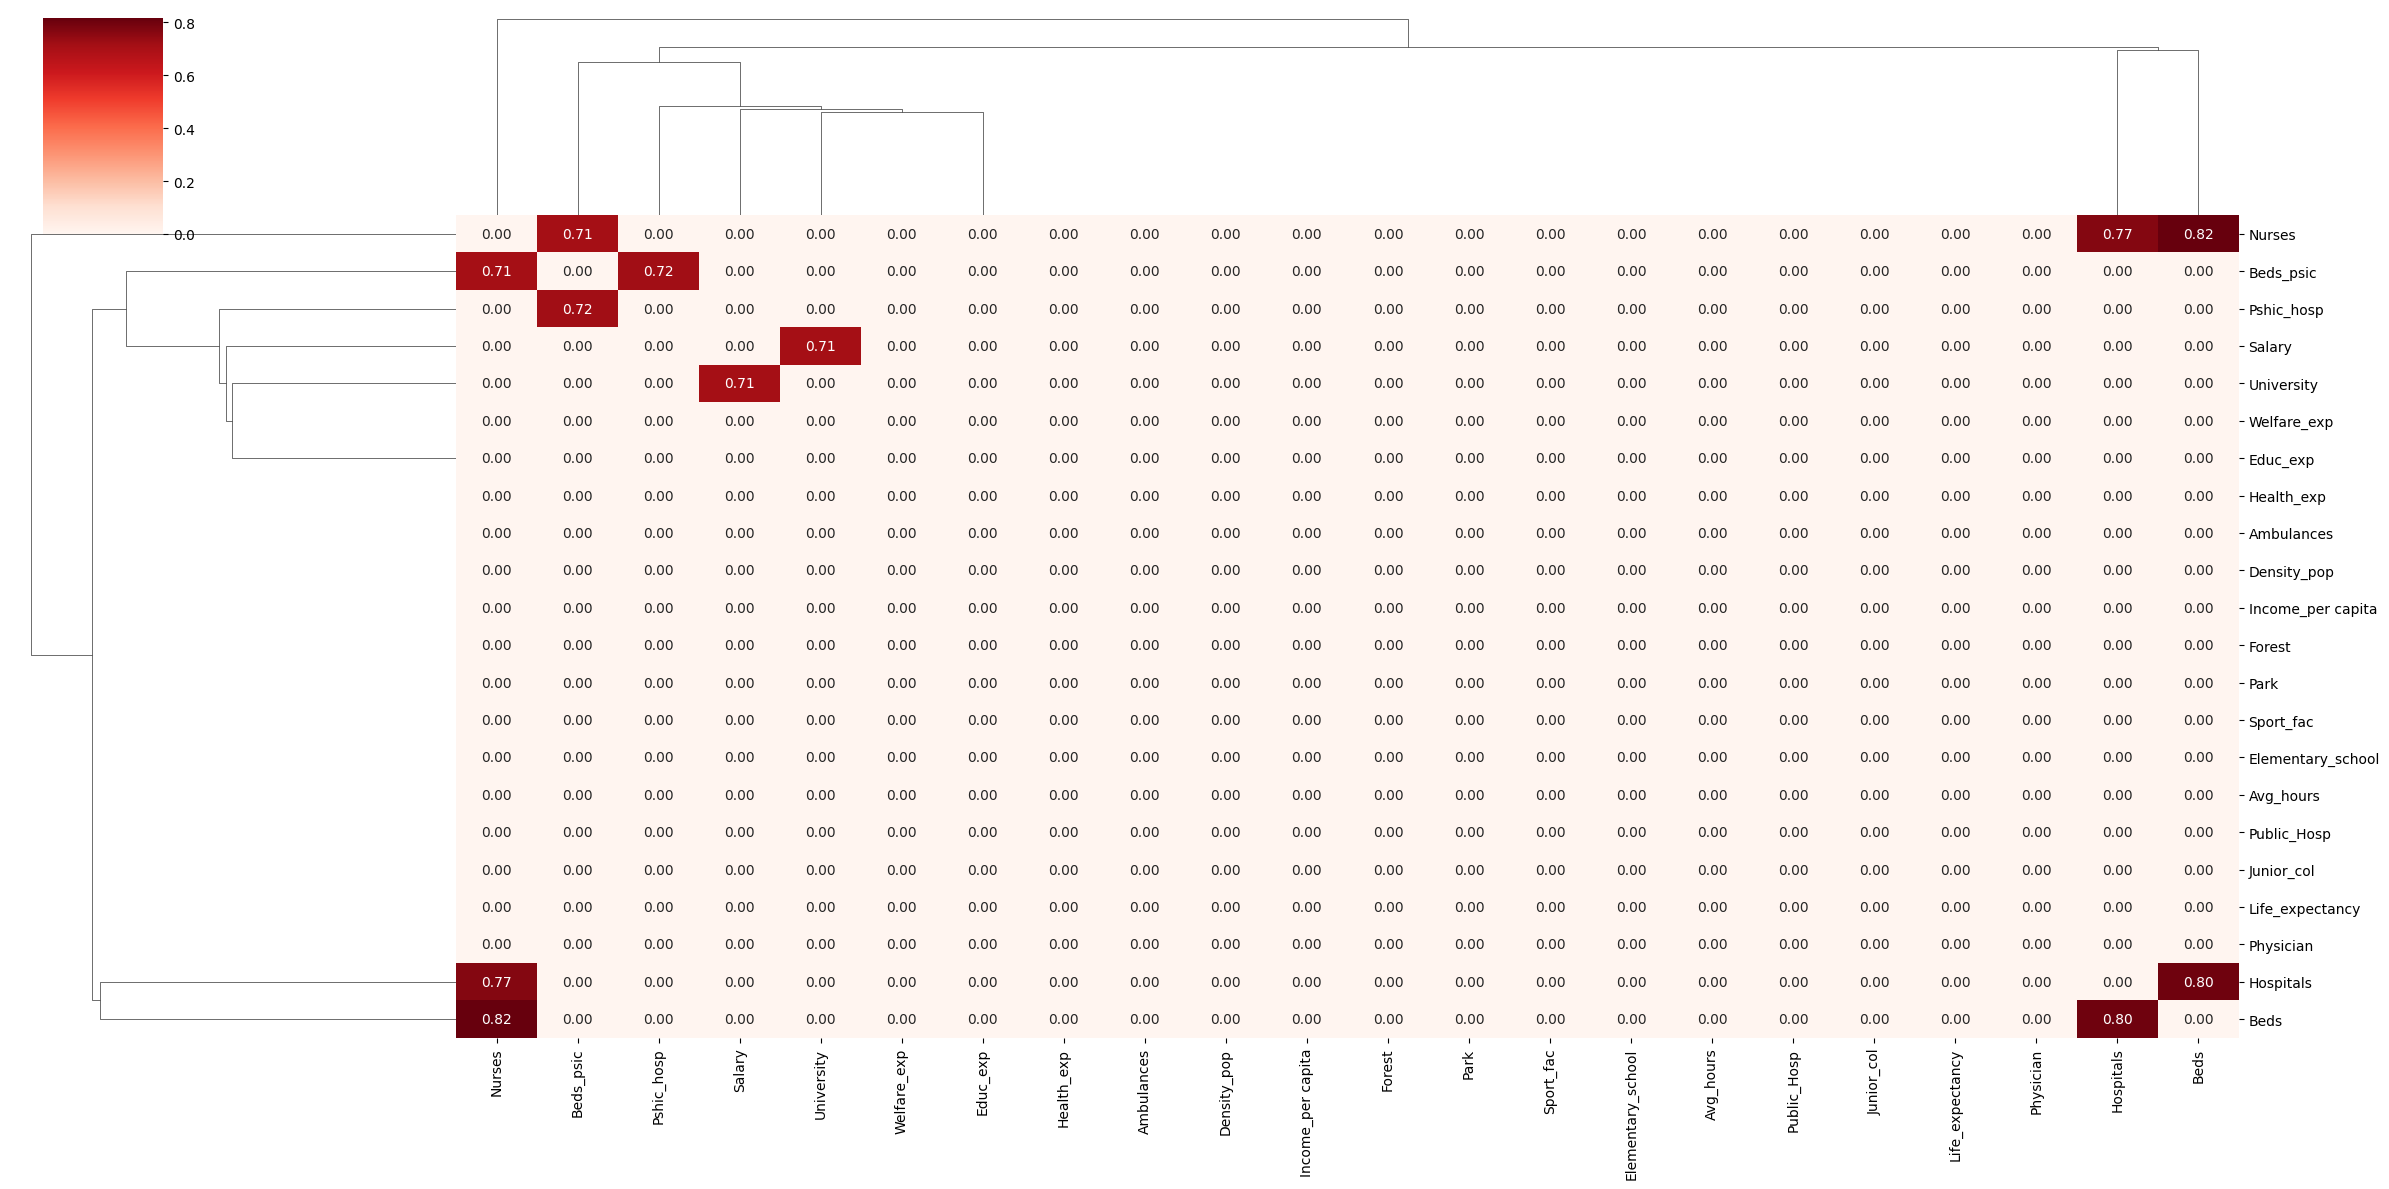

In [25]:
#KENDALL
filtered_corr_matrix_k = filter_significant(correlation_matrix_k)
sns.clustermap(filtered_corr_matrix_k.fillna(0), annot=True, cmap='Reds', fmt='.2f', figsize=(24, 12))
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


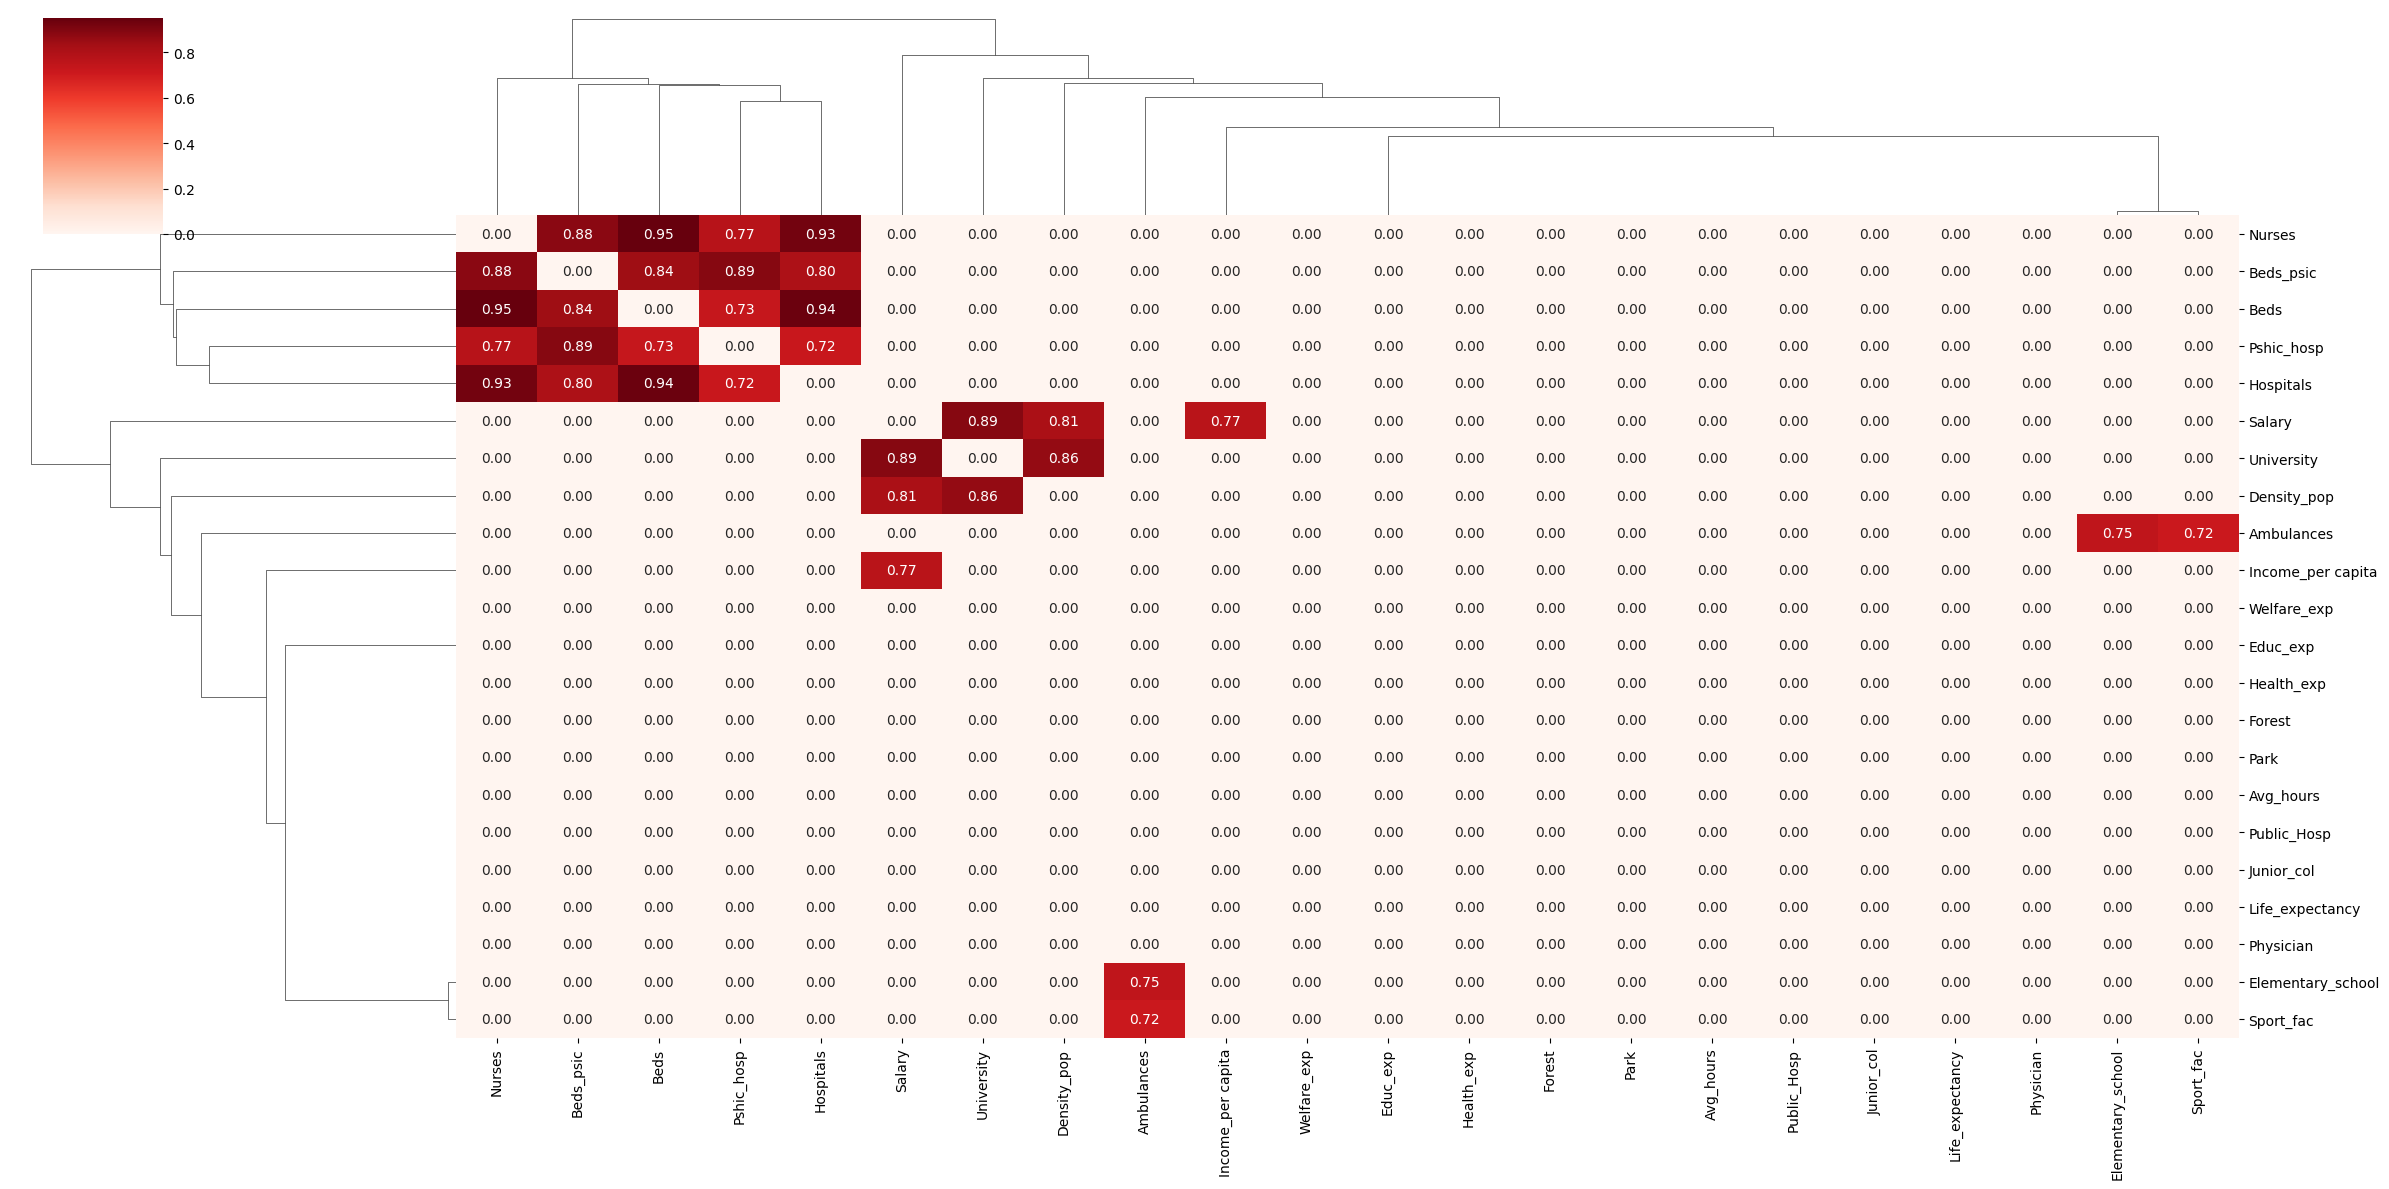

In [26]:
#Spearman
filtered_corr_matrix_s = filter_significant(correlation_matrix_s)
sns.clustermap(filtered_corr_matrix_s.fillna(0), annot=True, cmap='Reds', fmt='.2f', figsize=(24, 12))
plt.show()

##Taking The Spearman Correlation:

In [27]:
def extract_significant_features(corr_matrix, threshold=0.7):
    significant_pairs = []
    for i in range(corr_matrix.shape[0]):
        for j in range(i + 1, corr_matrix.shape[1]):
            if corr_matrix.iloc[i, j] > threshold:
                significant_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return significant_pairs

In [28]:
def extract_life_expectancy_corr(corr_matrix, target_feature="Life_expectancy", threshold=0.7):
    if target_feature not in corr_matrix.index:
        print(f"{target_feature} not found in the correlation matrix.")
        return []
    target_corr = corr_matrix.loc[target_feature]
    significant_features = target_corr[target_corr > threshold].index.tolist()
    significant_features.remove(target_feature)
    return [(target_feature, feature, target_corr[feature]) for feature in significant_features]

In [29]:
threshold = 0.7

In [30]:
significant_features_s = extract_significant_features(correlation_matrix_s, threshold=threshold)
life_expectancy_corr_s = extract_life_expectancy_corr(correlation_matrix_s, threshold=threshold)

In [31]:
print(f"Significant features with correlation > {threshold} (Spearman):")
for pair in significant_features_s:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

Significant features with correlation > 0.7 (Spearman):
University and Salary: 0.89
University and Density_pop: 0.86
Pshic_hosp and Beds_psic: 0.89
Pshic_hosp and Nurses: 0.77
Pshic_hosp and Hospitals: 0.72
Pshic_hosp and Beds: 0.73
Beds_psic and Nurses: 0.88
Beds_psic and Hospitals: 0.80
Beds_psic and Beds: 0.84
Nurses and Hospitals: 0.93
Nurses and Beds: 0.95
Salary and Income_per capita: 0.77
Salary and Density_pop: 0.81
Elementary_school and Ambulances: 0.75
Sport_fac and Ambulances: 0.72
Hospitals and Beds: 0.94


In [32]:
correlated_features = {pair[1] for pair in significant_features_s}
print("Features correlated with 'Life Expectancy' (Spearman, > 0.7):")
for feature in correlated_features:
    print(feature)

Features correlated with 'Life Expectancy' (Spearman, > 0.7):
Ambulances
Income_per capita
Nurses
Salary
Hospitals
Beds_psic
Density_pop
Beds


##Getting The Trend from Correlated Features:

In [33]:
df['Life_expectancy']

,Life_expectancy
0,84.65
1,83.79
2,82.80
3,84.48
4,84.24
5,84.91
6,84.54
7,83.71
8,84.71
9,84.16


In [34]:
significant_features_s

[('University', 'Salary', np.float64(0.8891201989572579)),
 ('University', 'Density_pop', np.float64(0.862115832872903)),
 ('Pshic_hosp', 'Beds_psic', np.float64(0.8875524292358187)),
 ('Pshic_hosp', 'Nurses', np.float64(0.7724628308537244)),
 ('Pshic_hosp', 'Hospitals', np.float64(0.7203861458991377)),
 ('Pshic_hosp', 'Beds', np.float64(0.7283403198367099)),
 ('Beds_psic', 'Nurses', np.float64(0.880781683626272)),
 ('Beds_psic', 'Hospitals', np.float64(0.803817283795571)),
 ('Beds_psic', 'Beds', np.float64(0.8396160962072156)),
 ('Nurses', 'Hospitals', np.float64(0.9274147464140151)),
 ('Nurses', 'Beds', np.float64(0.9501618871415356)),
 ('Salary', 'Income_per capita', np.float64(0.765112312770935)),
 ('Salary', 'Density_pop', np.float64(0.8122109158186864)),
 ('Elementary_school', 'Ambulances', np.float64(0.7483219547303743)),
 ('Sport_fac', 'Ambulances', np.float64(0.7150996999928892)),
 ('Hospitals', 'Beds', np.float64(0.9395604961331884))]

In [35]:
significant_features = [feature[0] for feature in significant_features_s]

In [36]:
significant_features = list(set(significant_features))

<Figure size 600x600 with 0 Axes>

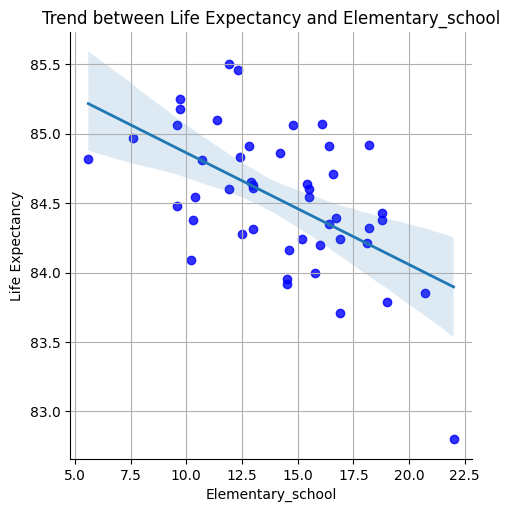

<Figure size 600x600 with 0 Axes>

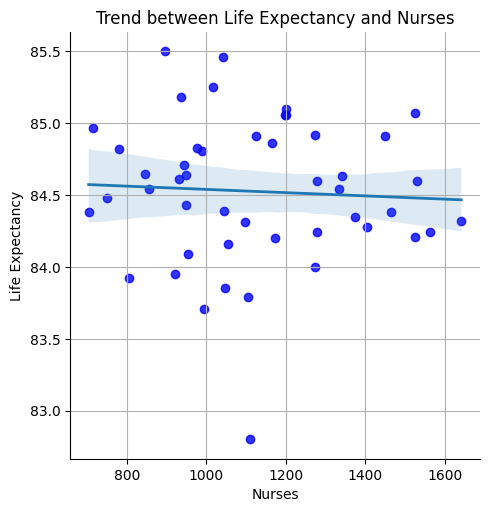

<Figure size 600x600 with 0 Axes>

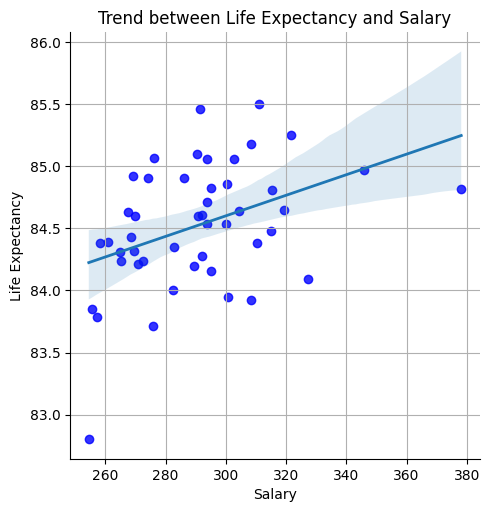

<Figure size 600x600 with 0 Axes>

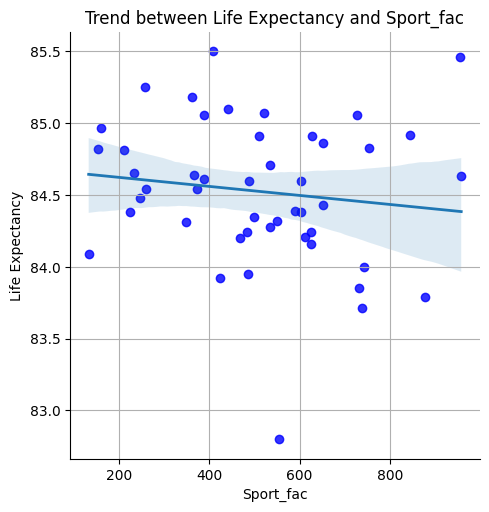

<Figure size 600x600 with 0 Axes>

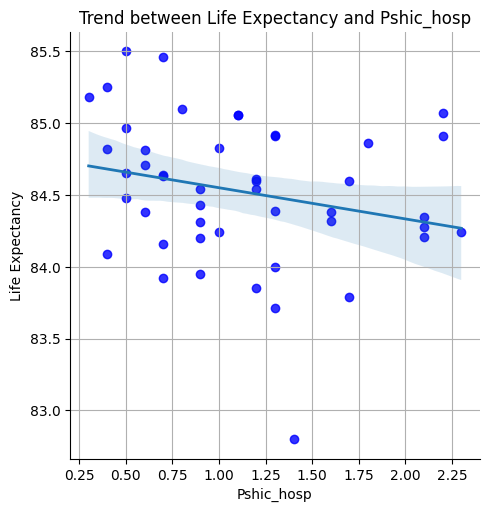

<Figure size 600x600 with 0 Axes>

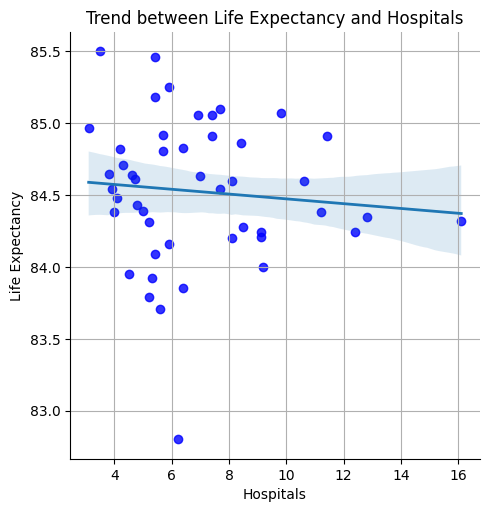

<Figure size 600x600 with 0 Axes>

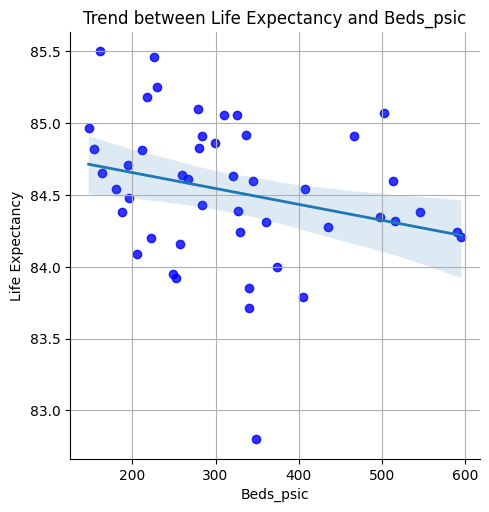

<Figure size 600x600 with 0 Axes>

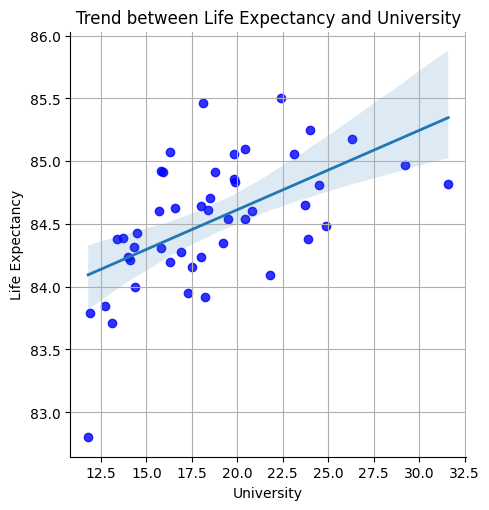

In [37]:
for feature in significant_features:
    if feature in df.columns:
        plt.figure(figsize=(6,6))
        sns.lmplot(x=feature, y='Life_expectancy', data=df, scatter_kws={'marker': 'o', 'color': 'b', 's': 36}, line_kws={'linestyle': '-', 'linewidth': 2})
        plt.xlabel(feature)
        plt.ylabel('Life Expectancy')
        plt.title(f'Trend between Life Expectancy and {feature}')
        plt.grid(True)
        plt.show()

## Final Deductions:
Outcome of the project:
1. University Enrollment and Higher Salary:
Positive Correlation: The positive correlation between University and Salary suggests that, generally, individuals who are enrolled in university or have higher education levels tend to earn higher salaries.
Higher Education: University education often equips people with specialized skills and qualifications, which can lead to better-paying jobs and higher income potential.
2. Salary and Life Expectancy:
There is likely a positive relationship between Salary and Life Expectancy as well. Higher salaries may be associated with better access to healthcare, healthier living conditions, improved nutrition, and overall better quality of life, which are factors that contribute to longer life expectancy.

## Insights and Conclusion
- There are moderate to strong positive correlations between life expectancy and physician availability, GDP per capita, and health expenditure.
- Policymakers should consider investing in healthcare infrastructure and accessibility.
- Further work could include time series modeling or comparative analysis with other countries.